# Case study 02 (Week 06)

## **Description**

***Case Study on Measures of Central Tendency and Dispersion***

An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information.

1.Find out how many males and females participated in the test.

2.What do you think about the students' parental level of education?

3.Who scores the most on average for math, reading and writing based on

- Gender
- Test preparation course

4.What do you think about the scoring variation for math, reading and writing based on

- Gender
- Test preparation course

5.The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


## Q1. Find out how many males and females participated in the test.

In [1]:
# NumPy Library as np
import numpy as np
# Pandas Library as 'pd'
import pandas as pd
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Seaborn Library as 'sns'
import seaborn as sns
# Writing the Dataset from the csv file to Pandas Dataframe named 'sp'
# import warnings
# warnings.filterwarnings("ignore")
sp = pd.read_excel('StudentsPerformance.xlsx')

In [27]:
# Sample preview of 5 random rows of Dataframe
sp.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
777,male,group C,high school,standard,none,71,66,65
29,female,group C,associate's degree,standard,none,39,64,57
54,female,group C,high school,standard,none,44,61,52
282,female,group D,high school,free/reduced,completed,65,61,71
339,female,group D,some college,free/reduced,none,69,65,74


In [20]:
# Checking for Null values
sp.isnull().sum().to_frame('Null values')

,Null values
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [34]:
# Defining variables from the values got from Dataframe
Total = sp.gender.count() # Alt method, Total = ((sp['gender'] == 'female') | (sp['gender'] == 'male')).sum()
female_count =(sp.gender == 'female').sum()
male_count=(sp.gender == 'male').sum()
print("Out of the",Total,"students participated in the test,",female_count,"are females and",male_count," are Males.")

Out of the 1000 students participated in the test, 518 are females and 482  are Males.


## Q2. What do you think about the students' parental level of education?

In [58]:
# Creating a dataframe consists of the unique values
ed_lvl = sp['parental level of education'].unique()
ed_lvl_data = pd.DataFrame(ed_lvl, columns = ['Parental education level'], index = ['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6'])
ed_lvl_data

,Parental education level
Type 1,some high school
Type 2,high school
Type 3,some college
Type 4,associate's degree
Type 5,bachelor's degree
Type 6,master's degree


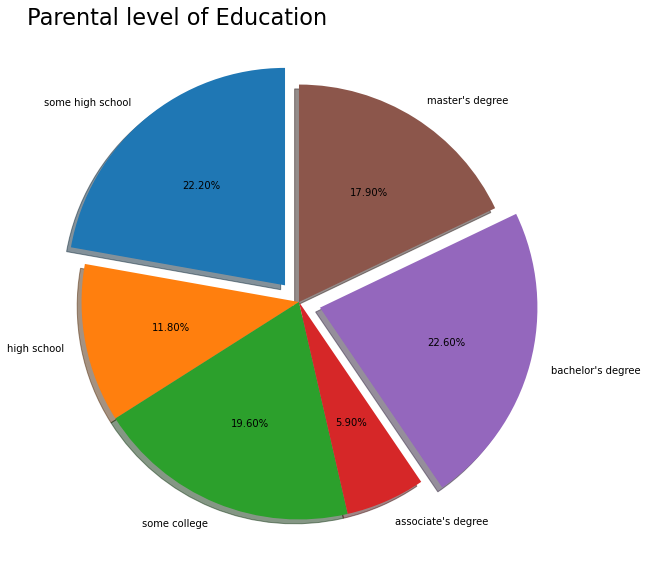

In [116]:
# Variable for plot
explode = (0.1, 0, 0, 0, 0.1, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(17,10))
plt.pie(sp.loc[:,['parental level of education']].groupby('parental level of education').size(), explode=explode,  shadow=True, startangle=90, labels = list(sp['parental level of education'].unique()), autopct='%1.2f%%')
plt.title(label="Parental level of Education",
          loc="left",
          fontsize=22.5)
plt.show()

### Insights :
- In this analysis, it's clear that the Top 3 Positions are secured by these categories       
    1. Bachelor's Degree
    2. Some high school
    3. Some college
- A big chunk of the students have parents with 'some high school' qualification, so they tried to give more importance to their child's education because of their lack of 'Advanced education'
- Interesting part is parents with higher grade literacy were not much bothered about this test

## Q3. Who scores the most on average for math, reading and writing based on

- Gender
- Test preparation course


In [138]:
# Mean by Gender
sp.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


> ### *Male participants dominated in Reading and Writing while Female participants dominated in Math*

In [170]:
# Mean by Gender
sp.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


> ### *Participants who completed the Test preparation course dominated in all 3 regions of test*

## Q4. What do you think about the scoring variation for math, reading and writing based on

- Gender
- Test preparation course


In [218]:
# Standard variation based on gender
sp.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [172]:
# Standard variation based on prep. course
sp.groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

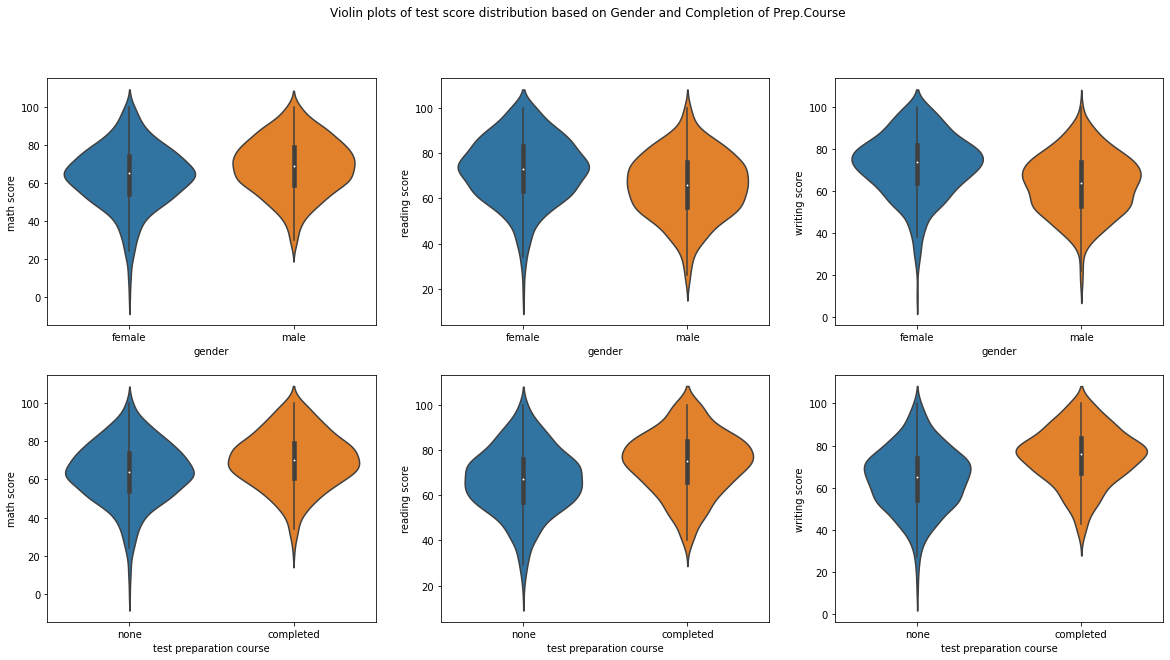

In [217]:
# Ploting Violin plots based on 2 criteria
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
  
fig.suptitle('Violin plots of test score distribution based on Gender and Completion of Prep.Course')

sns.violinplot(ax=axes[0, 0], data=sp, x = sp['gender'], y = sp['math score'])
sns.violinplot(ax=axes[0, 1], data=sp, x = sp['gender'], y = sp['reading score'])
sns.violinplot(ax=axes[0, 2], data=sp, x = sp['gender'], y = sp['writing score'])
sns.violinplot(ax=axes[1, 0], data=sp, x = sp['test preparation course'], y = sp['math score'])
sns.violinplot(ax=axes[1, 1], data=sp, x = sp['test preparation course'], y = sp['reading score'])
sns.violinplot(ax=axes[1, 2], data=sp, x = sp['test preparation course'], y = sp['writing score'])

### Insights :
- Data of female category in the 3 of them and those who skipped the preparation course contains too much outliers before the first quartile. This is not desirable because outliers can cause serious problems in our statistical analysis
- Out of the 6 plots 2 of the last plots (Reading and Writing scores based on the choice of prep.course) shows much Wider sections. Which shows a higher probability of observations taking a given value in that region
- As compared to the data filtered by female category, variations in Male category is negligible and it only contains a low amount of outliers in the data

## Q5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [243]:
# Getting the statistical properties of Math score
sp['math score'].describe().to_frame()

,math score
count,1000.000000
mean,66.001000
std,15.569567
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000


In [245]:
# Getting the Median of Math score
sp['math score'].median()

66.0

<AxesSubplot:xlabel='math score', ylabel='Count'>

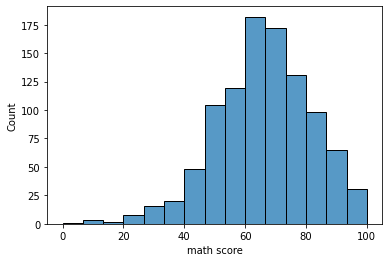

In [9]:
# Plotting a histogram based on math score
sns.histplot(x = sp['math score'], bins = 15)

> ### Mean and median lies in the same range, so it's a reliable data to solve our problem.

In [14]:
# Creating a dataframe consists of the details of Top 250 students in Math section.
toppers = sp[['gender','math score']].sort_values(['math score'],ascending=False).head(250)
toppers.sample(10)

,gender,math score
982,male,94
504,female,93
976,male,91
438,female,79
879,male,79
463,female,82
434,female,78
494,female,89
955,male,88
456,female,81


In [25]:
toppers.describe()

,math score
count,250.000000
mean,85.052000
std,6.270452
min,77.000000
25%,80.000000
50%,84.000000
75%,89.000000
max,100.000000


In [27]:
Tf = (toppers['gender'] == 'female').sum()
Tm = (toppers['gender'] == 'male').sum()
print('Out of 250 toppers',Tf,'of them are females and',Tm,'are males.')

Out of 250 toppers 102 of them are females and 148 are males.


### Notes :
- 'toppers' dataframe consists of the details of Top 250 students
- Minimum score is 77 and Maximum score is 100 in this Data
- About 75% of the Toppers scored 89/100